In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
HouseDS = pd.read_csv('housing_price_dataset.csv')

In [9]:
HouseDS.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [10]:
HouseDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [11]:
HouseDS.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [12]:
HouseDS.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [13]:
print(HouseDS.dtypes)

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object


<Axes: xlabel='Price', ylabel='SquareFeet'>

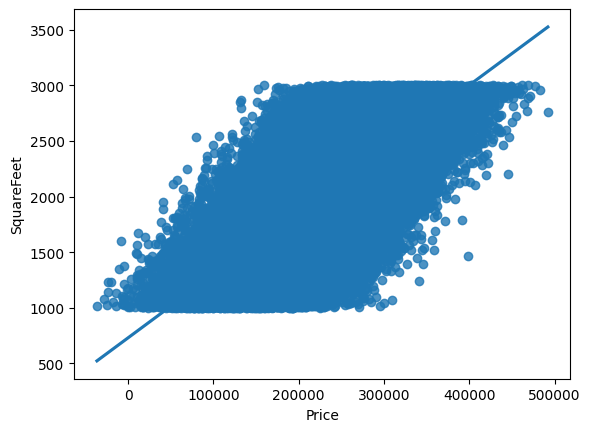

In [57]:
sns.regplot(data=HouseDS, x='Price', y='SquareFeet')


<Axes: xlabel='Price', ylabel='Bathrooms'>

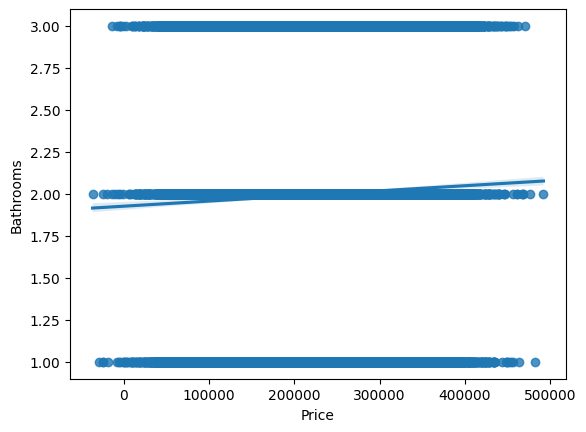

In [61]:
sns.regplot(data=HouseDS, x='Price', y='Bathrooms')

<Axes: xlabel='Price', ylabel='Bedrooms'>

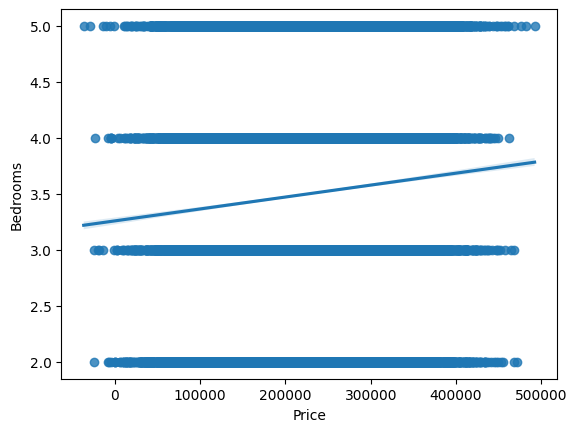

In [63]:
sns.regplot(data=HouseDS, x='Price', y='Bedrooms')

In [62]:
X= HouseDS[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']]

y= HouseDS['Price']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.40, random_state=42)

In [48]:
print(X_train.dtypes)

SquareFeet    int64
Bedrooms      int64
Bathrooms     int64
YearBuilt     int64
dtype: object


In [49]:
print(y_train.dtypes)

float64


In [50]:
model= LinearRegression()

In [51]:
model.fit(X_train, y_train)


LinearRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 2477943594.150653
R-Squared: 0.5694038185695367


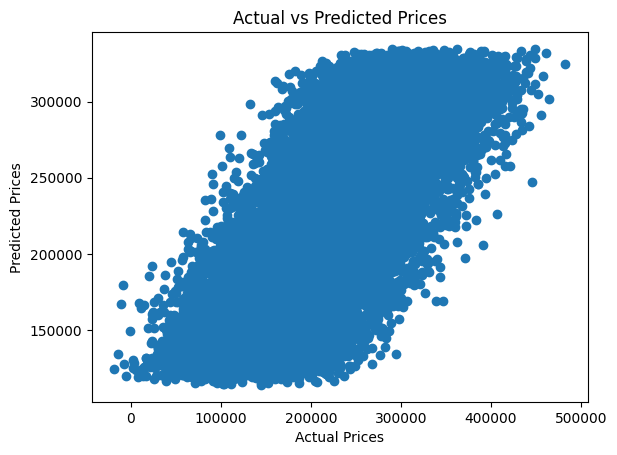

In [54]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [44]:
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)

            Coefficient
SquareFeet    99.804543
Bedrooms    5181.135008
Bathrooms   2869.684901
YearBuilt     10.890463
